# **DATA** **COLLECTION**

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

#load the dataset
df = pd.read_csv('titanic.csv')
df.head()

Saving titanic.csv to titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.shape


(891, 12)

In [ ]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :', cat_col)

#Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns : ',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns :  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
#Checking for missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
#Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
#drop cabin column as Data Cleaning
df.drop(columns='Cabin', inplace=True)

In [ ]:
#Converting categorical variable
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
#Normalization
#from sklearn.preprocessing import StandardScaler

In [ ]:
#Scaler = StandardScaler()
#df[['Age','Fare']] = Scaler.fit_transform(df[['Age','Fare']])

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        True  
4            373450  

In [ ]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


# **DATA VISUALIZAING**

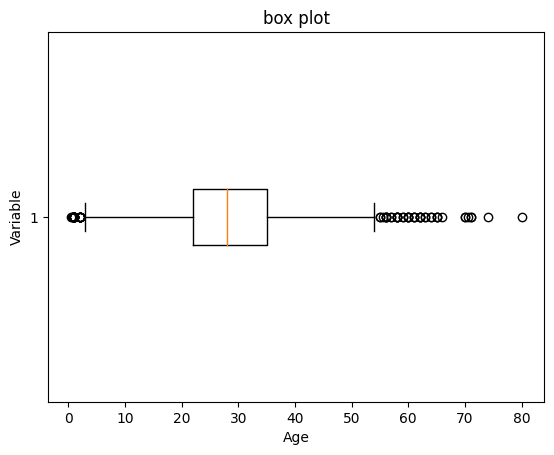

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


#create a boxplot
plt.boxplot(df['Age'], vert=False)

#add labels and title
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('box plot')

#show the plot
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#calculate the value counts for  'Embarked' column
embarked_counts=df['Embarked'].value_counts()

#data for the donut chart
labels=['Southampton','Cherbourg','Queentown'] #citynames

#create a color palette
color=sns.color_palette('pastel')

#create a donut chart with Seaborn
plt.figure(figsize=(4,4))
plt.pie(sizes)

Correlation Analysis Understanding Relationships between Features

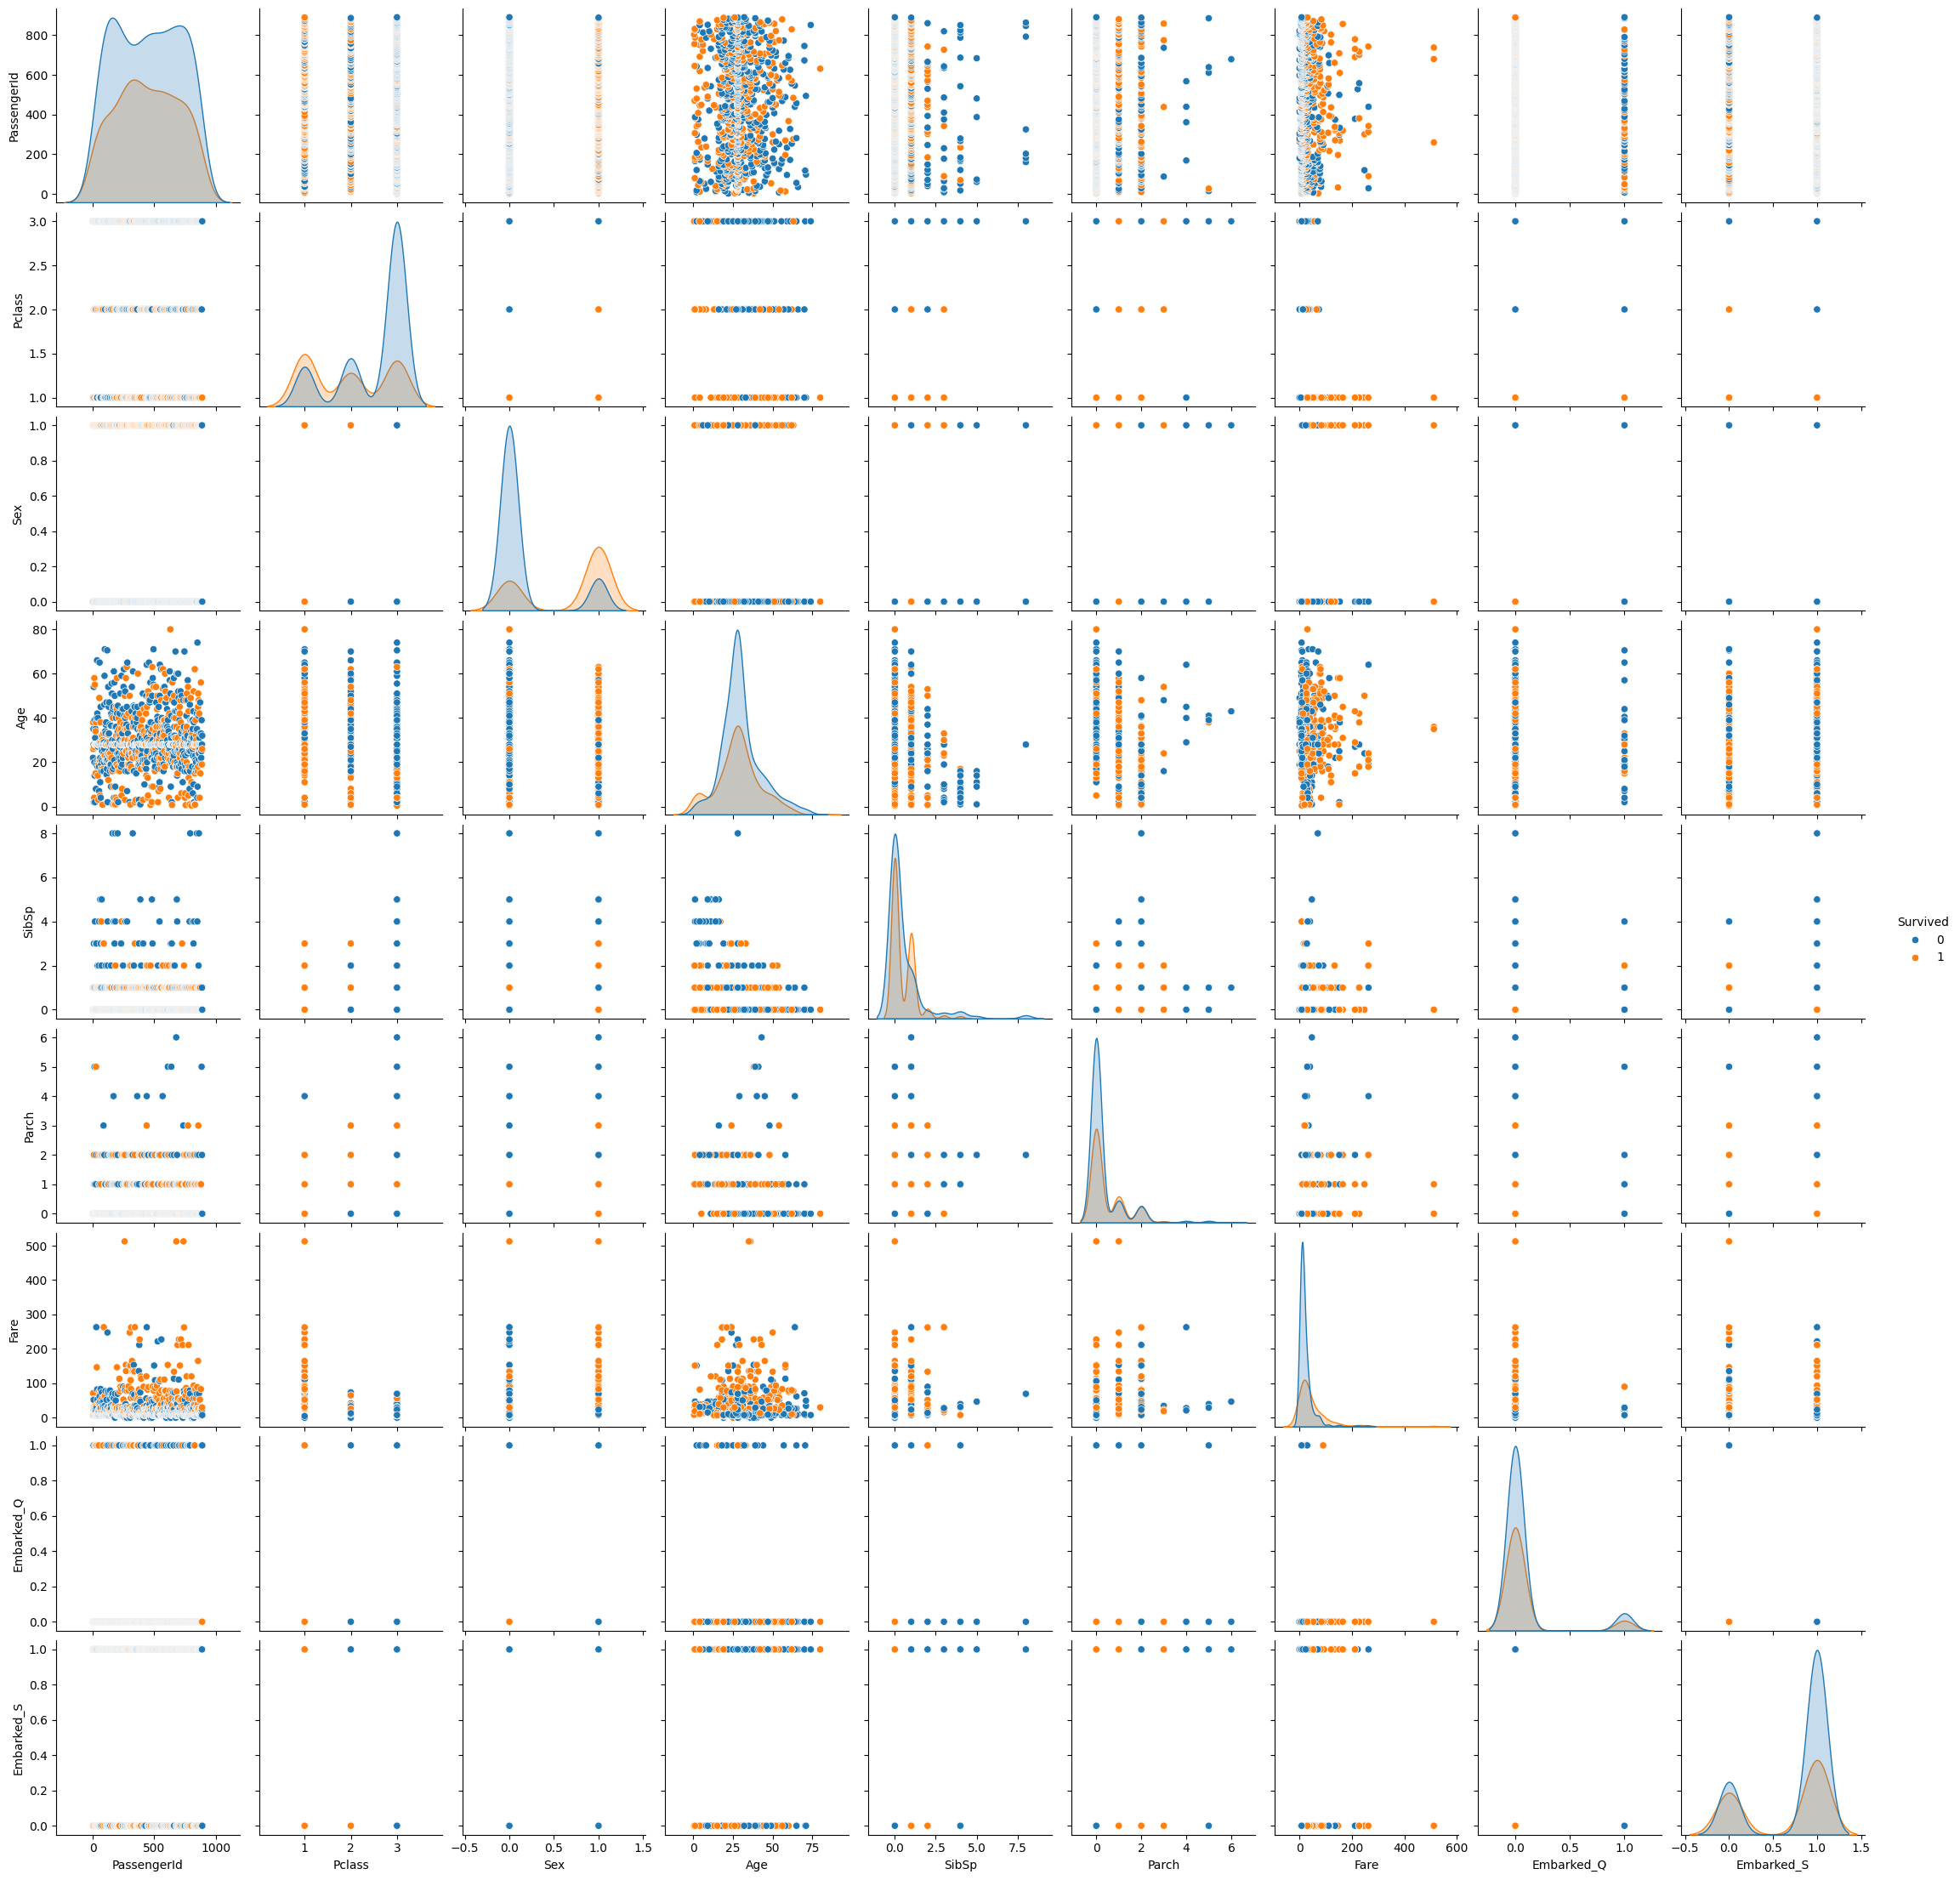

In [ ]:
#Group By Analysis
#print (df.groupby('Survived').mean())

#Correlation Analysis
sns.pairplot(df, hue='Survived', diag_kind='kde')

#show the plot
plt.show()

Age Distribution Plot

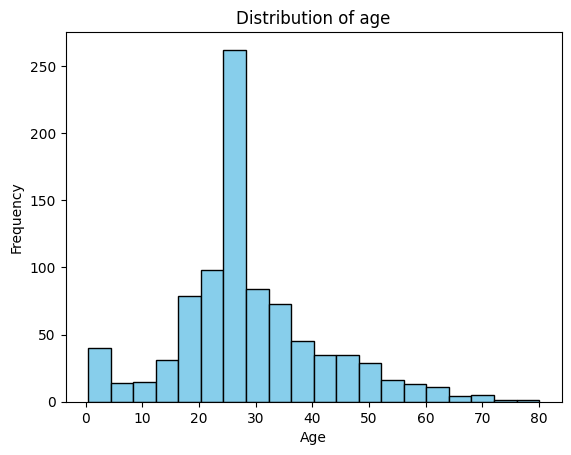

In [ ]:
#create a histogram
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')

#add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age')

#show the plot
plt.show()

Number of Male and Female Passengers

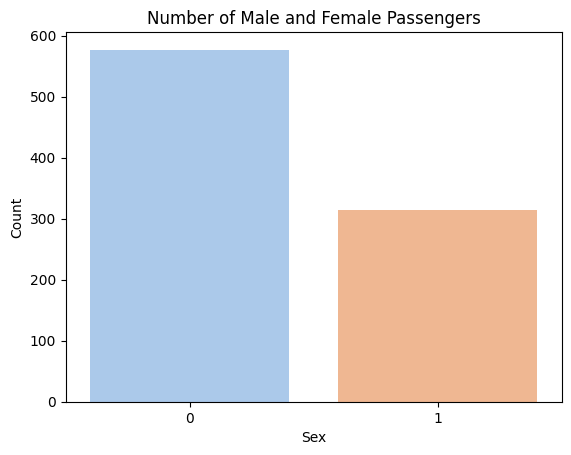

In [ ]:
sns.countplot(data=df, x='Sex', palette='pastel', hue='Sex', legend=False)

#add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Number of Male and Female Passengers')

#show the plot
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.pie('sex', label=['Male','Female'],autopct='%.1f%%',colors=['lightblue','pink'])
plt.legend()
plt.title('Male & Female')
plt.show()

Survivors by Gender

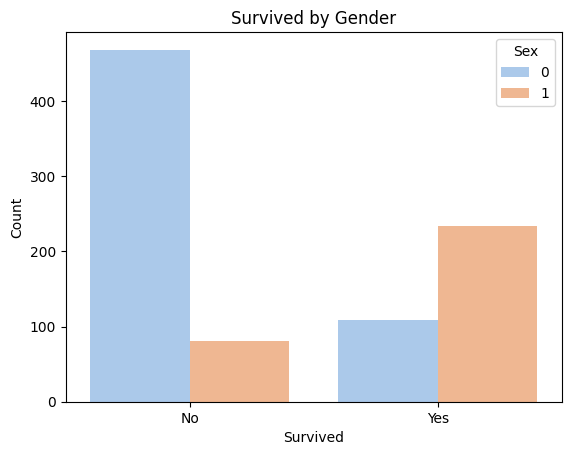

In [ ]:
#create a count  plot
sns.countplot(data=df, x='Survived', hue='Sex', palette='pastel')

#replace x-axis label 0 and 1  with 'No and 'Yes'
plt.xticks(ticks=[0,1], labels=['No','Yes'])

#add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived by Gender')

#showing plot
plt.show()

Survivors by Age Class

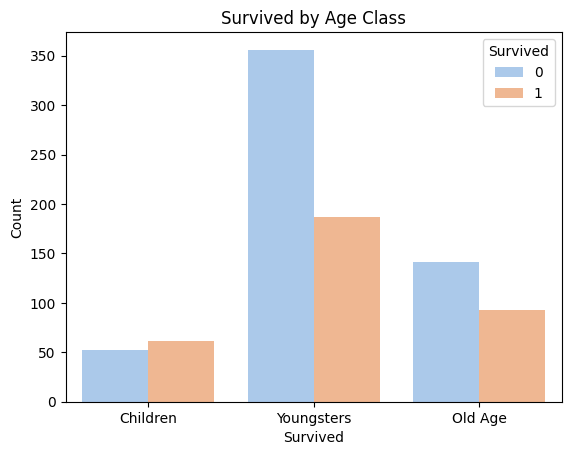

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#define age ranges for each class
age_bins=[0,18,35,df['Age'].max()]
age_labels=['Children','Youngsters','Old Age']

#Categorize ages into  classes without creating a new column
df['Age']=pd.cut(df['Age'],bins=age_bins,labels=age_labels, right=False)

#create a bar plot
sns.countplot(data=df,x='Age',hue='Survived',palette='pastel')

#add labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survived by Age Class')

#Show the plot
plt.show()